# Linear Regression wirth Python
Galton's phenomenon, often linked to linear regression, observes that "a son's height tends to move closer to the average height of the population rather than exactly matching the father's height." This concept laid the foundation for the statistical method of regression analysis, where the relationship between variables (e.g., a father's height and a son's height) is studied to predict outcomes while accounting for tendencies toward a central value (the mean).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
df=pd.read_csv('/content/sample_data/USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Exploratory Data Analysis
Let's dive into the data!

We'll focus solely on the numerical data from the CSV file.
First, we examine the distribution of house prices, as our goal is to predict them. Then, we'll use Seaborn to create a joint plot to visualize the relationship between the "Average Area Income" and "Price" columns.

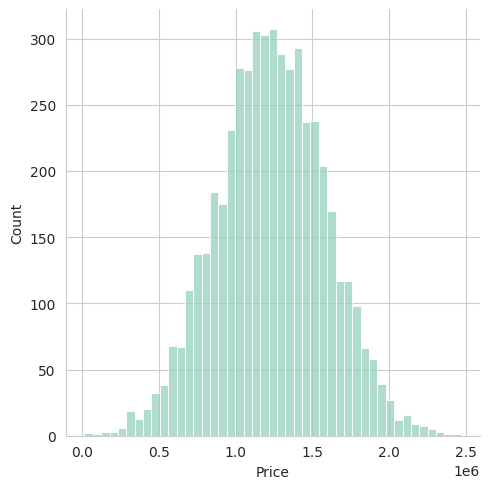

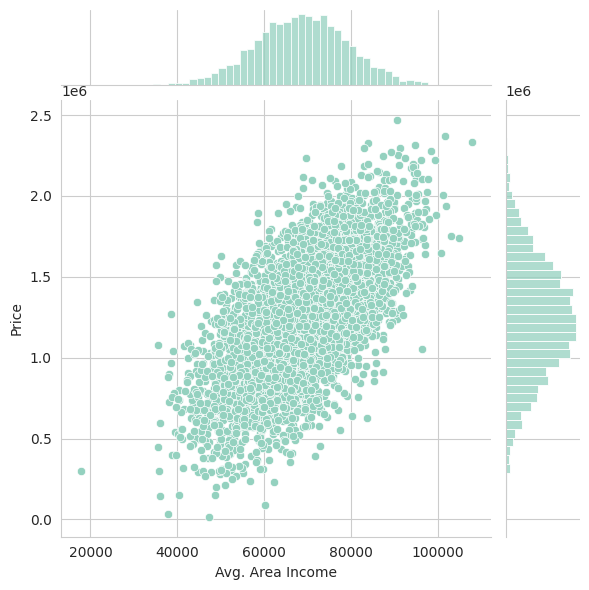

In [11]:
# sns.pairplot(customers)
sns.displot(df['Price'])
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Avg. Area Income',y='Price',data=df)

Next, we use `jointplot` to create a 2D hexbin plot to compare **Price** and **Average Area Income**.



In [ ]:
sns.jointplot(x='Avg. Area Income',y='price',kind='hex',data=df)

Let's examine these relationships across the entire dataset. Use [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot shown below. (No need to match the colors exactly.)

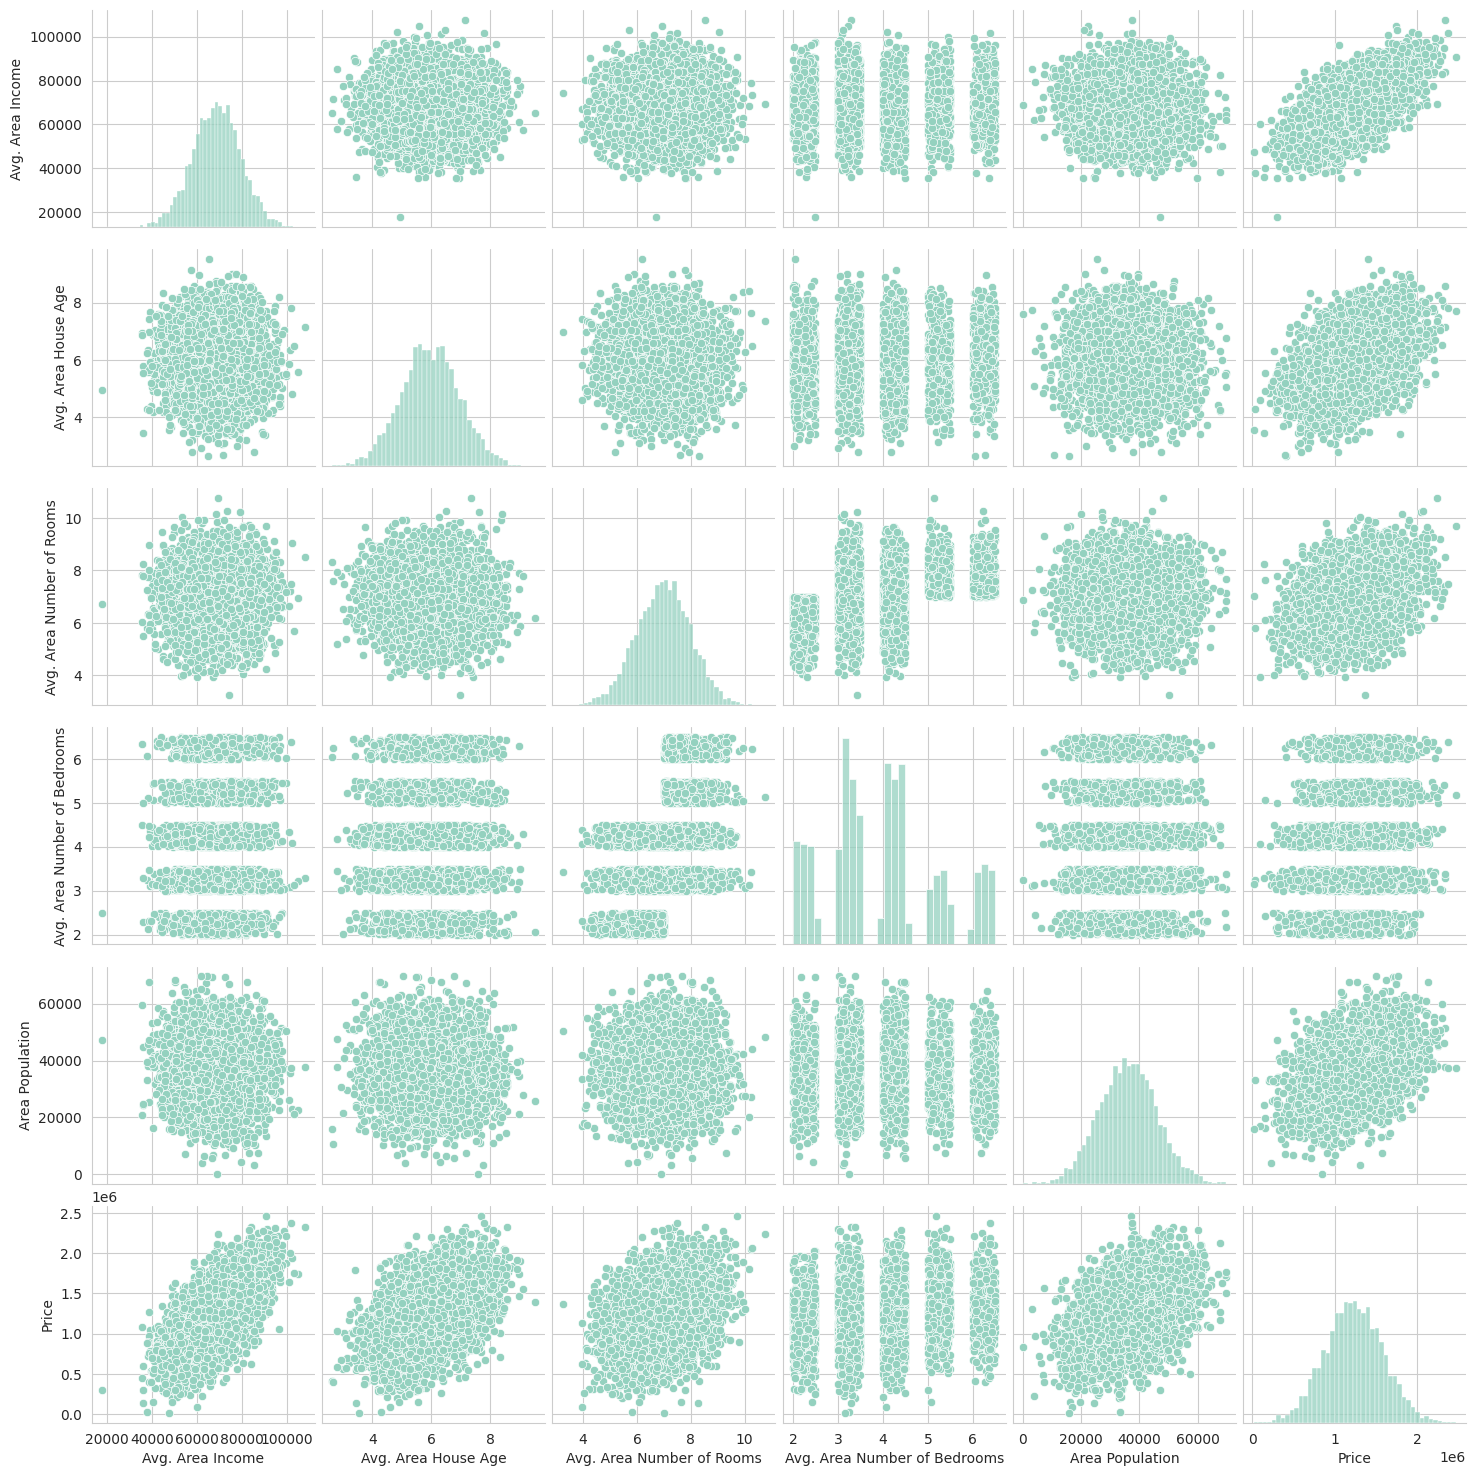

In [12]:
sns.pairplot(df)

Create a linear model plot using Seaborn's `lmplot` to visualize the relationship between **Price** and **Average Area Income**.

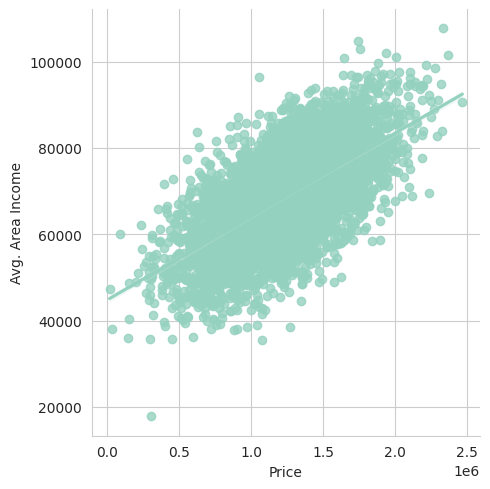

In [13]:
sns.lmplot(data=df,x='Price',y='Avg. Area Income')

In [16]:
customers=pd.read_csv('/content/sample_data/Ecommerce Customers')

In [17]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Training and Testing Data
Assign the numerical features of the customers to a variable `X` and the **"Yearly Amount Spent"** column to a variable `y`.

In [37]:
# X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [44]:
# y=customers['Yearly Amount Spent']
y = customers['Yearly Amount Spent']

In [39]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
y_test

,Yearly Amount Spent
18,452.315675
361,401.033135
104,410.069611
4,599.406092
156,586.155870
...,...
147,479.731938
346,488.387526
423,461.112248
17,407.704548


In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [56]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff.'])
cdf

,Coeff.
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [57]:
print("Intercept:", lm.intercept_)

Intercept: -1047.9327822502391


# Predicting Test Data

In [58]:
predictions=lm.predict(X_test)

In [59]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

# Evaluation

Text(0, 0.5, 'Predicted Y')

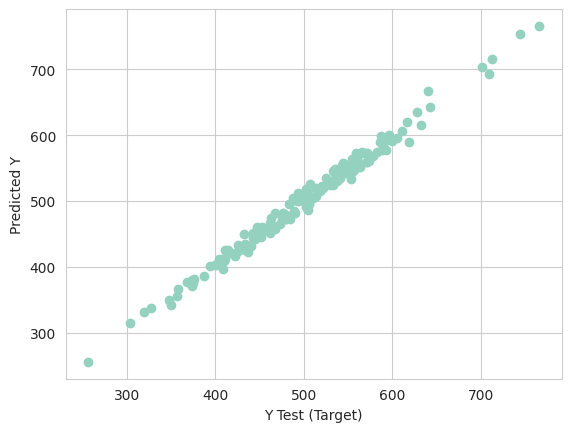

In [62]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (Target)')
plt.ylabel('Predicted Y')

### Evaluating the Model

To assess the performance of our model, we will calculate the **Residual Sum of Squares (RSS)** and the **Explained Variance Score (R²)**.

Additionally, we will compute the **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**. You can refer to the lecture or Wikipedia for the formulas to calculate these metrics.

### Residuals
You should have obtained a well-fitting model. Let's briefly examine the residuals to ensure everything is in order with our data.

Plot a histogram of the residuals to check if they follow a normal distribution. You can use either Seaborn's distplot or simply plt.hist() for this.

In [63]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


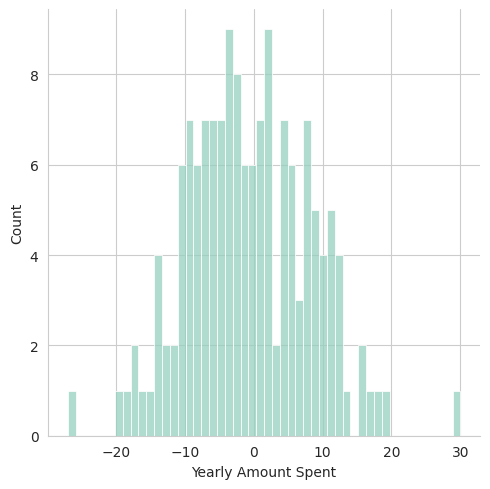

In [64]:
sns.displot((y_test-predictions),bins=50);